# Robust Regression

Robust regression is a form of regression analysis designed to overcome limitations of least square regression that works with less restrictive assumptions. It provides much better regression coefficient estimates when outliers are present in the data. The larger the number of outliners lying in the data, the larger the error is.

One way to solve this problem is to filter out or remove all the outliers from the data in the first place. But if our dataset contains larger number of outliners then removing these outliners will have a huge impact on our accuracy. So I will use a different method called RANSAC i.e., Random sample consensus.

RANSAC is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates.
RANSAC fits N models using different random sample S of the whole available data each time. Then, for each model it evaluates its performance P (i.e. number of inliers or outliers) and chooses the best one. For finding the parameters of the model I am using least square method.

The following is the processure of the RANSAC Algorithm
1. The input to the RANSAC algorithm is the set of datapoints containing outliners and our goal is to find model describing inliners.
2. It acheives its goal by iteratively selecting a random subset of original data. In case of a line in a two-dimensional plane two points are sufficient to fit a model.
3. The randomly chosen points are considered as hypothetical inliers and all other points are then tested against the fitted model.
4. The estimated model is reasonably good if sufficiently many points (due to the pre-defined threshold) have been classified as inliers.
5. This procedure is repeated a fixed number of times, every iteration producing a new model. The method stops once either a model with an appropriate inliners is found, or after a pre-defined number of iterations selecting a model with less outliers as the best model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
import sys

In [2]:
# RANSAC Parameters
ransac_iter = 10          # the maximum number of iterations allowed in the algorithm
ransac_threshold = 3      # a threshold value for determining when a data point fits a model
ransac_ratio = 0.6        # ratio of inliners required to assert that a model fits well to the data
n_samples = 1000           # no. of data points
outliers_ratio = 0.4      # ratio of outliers
n_inputs = 1
n_outputs = 1

In [40]:
def data_generation(n_samples, n_inputs, n_outputs, outliers_ratio):
    
    # Samples generation
    x = 50*np.random.random((n_samples,n_inputs))
    
    # generate line's slope
    perfect_fit = 0.5*np.random.normal(size=(n_inputs,n_outputs))
    
    # compute output
    y = np.dot(x,perfect_fit)
#     plt.scatter(x,y)
    # add a little gaussian noise
    x_noise = x + np.random.normal(size=x.shape)
    y_noise = y + np.random.normal(size=y.shape)
#     plt.scatter(x_noise,y_noise)
    # add some outliers to the point-set
    n_outliers = int(outliers_ratio*n_samples)
    indices = np.arange(x_noise.shape[0])
    np.random.shuffle(indices)
    outlier_indices = indices[:n_outliers]
#     print(outlier_indices)
    x_noise[outlier_indices] = 50*np.random.random(size=(n_outliers,n_inputs))
    y_noise[outlier_indices] = 50*np.random.normal(size=(n_outliers,n_outputs))
#     print(x_noise)
#     print(y_noise)
    return x_noise, y_noise

In [57]:
X, y = data_generation(500, 1, 1, 0.4)
print(X.shape)
print(y.shape)

(500, 1)
(500, 1)


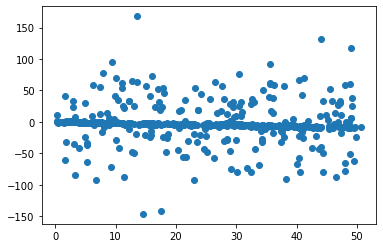

In [58]:
plt.scatter(X,y)

Now, functions are implemented for model estimation and its judgement. The first function estimates parameters of the line model y = mx + c for two randomly selected points, where m is line’s slope and c its y-intercept. For two randomly chosen points (x1, y1) and (x2, y2), m = (y2-y1)/(x2-x1), and c = y2-m*x2.

In [59]:
def model_line(data):
    # find a line model for these points
    m = (data[1,1]-data[0,1])/(data[1,0]-data[0,0])  # slope of the line
    c = data[1,1]-m*data[1,0]                        # y-intercept of the line
    return m, c

In [60]:
# This function find the intercept point of the line model with a normal from point (x0, y0) to it
def intercept_point(m, c, x, y): 
    # intersection point with the model
    x = (x+m*y-m*c)/(1+m**2)
    y = (m*x+(m**2)*y-(m**2)*c)/(1+m**2)+c
    return x, y

In [61]:
data = np.hstack((X,y))

In [62]:
ratio = 0
model_m = 0
model_c = 0

In [63]:
def ransac_plot(n, x, y, m, c, final=False, x_in=(), y_in=(), points=()):
    '''
    n = number of iterations
    points = picked up points for modelling
    x = samples x
    y = samples y
    m = slope of the line model
    c = intercept of the line
    x_in = inliners x
    y_in = inliners y
    '''

    title = 'iteration ' + str(n)
 
    if final:
        title = 'final solution'
 
    plt.figure("Ransac", figsize=(15, 15))
    
    plt.xticks([i for i in range(int(min(x)) - 10, int(max(x)) + 10, 5)])
    plt.yticks([i for i in range(int(min(y)) - 20, int(max(y)) + 20, 10)])
 
    # plot input points
    plt.scatter(x[:,0], y[:,0], marker='o', label='Input points')
 
    # draw the current model
    plt.plot(x, m*x + c, 'r', label='Line model')
 
    # draw inliners
    if not final:
        plt.scatter(x_in, y_in, marker='o', label='Inliers')
 
    # draw points picked up for the modeling
    if not final:
        plt.scatter(points[:,0], points[:,1], marker='o', label='Picked points')
 
    plt.title(title)
    plt.legend()
    plt.show()
    plt.close()

inlier ratio =  0.303
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


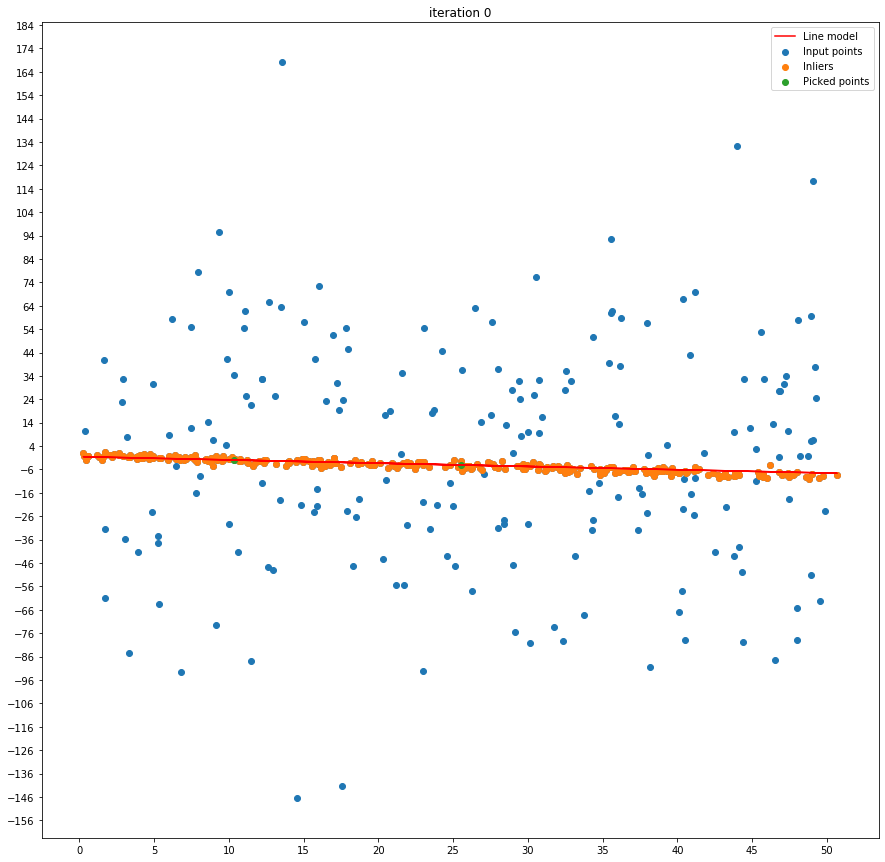

inlier ratio =  0.06
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


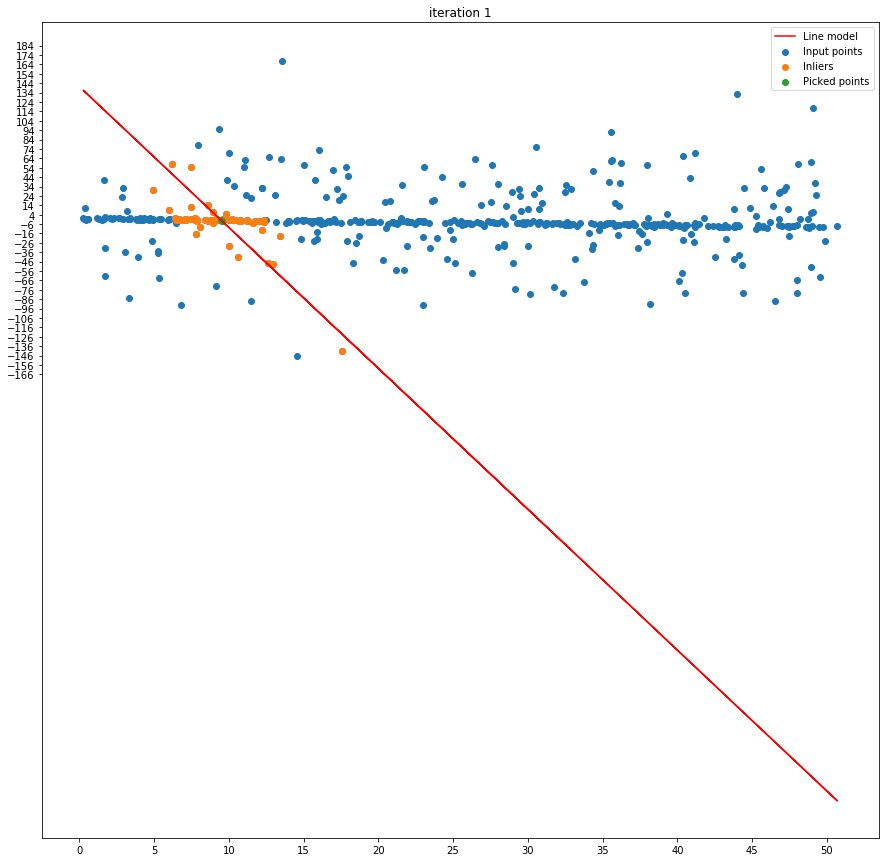

inlier ratio =  0.069
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


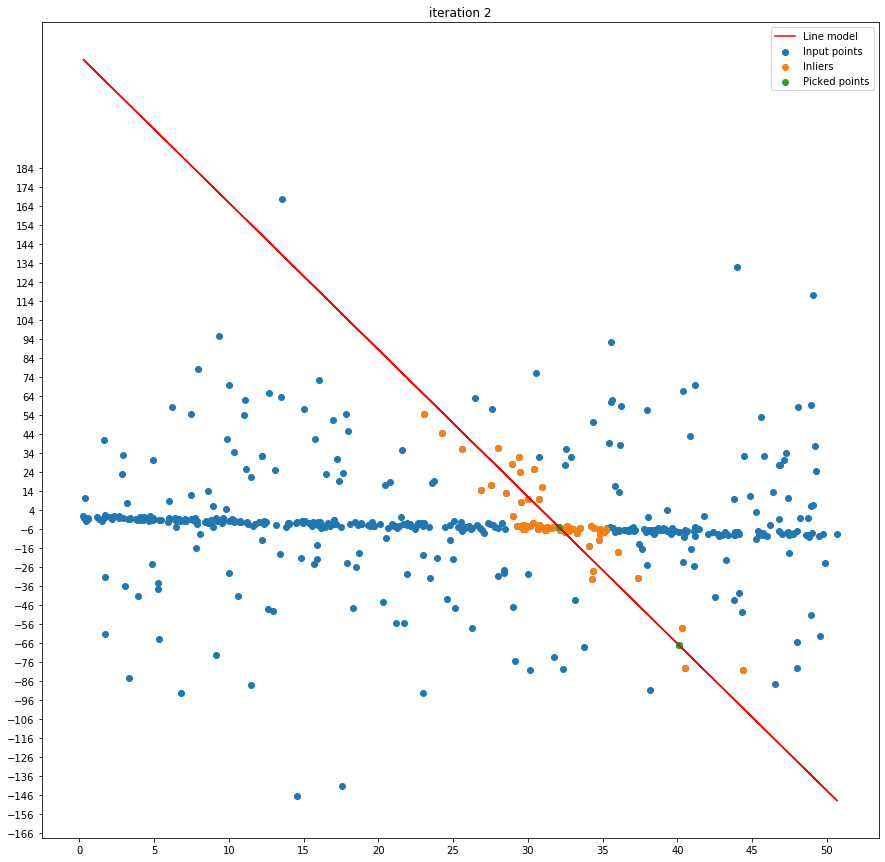

inlier ratio =  0.076
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


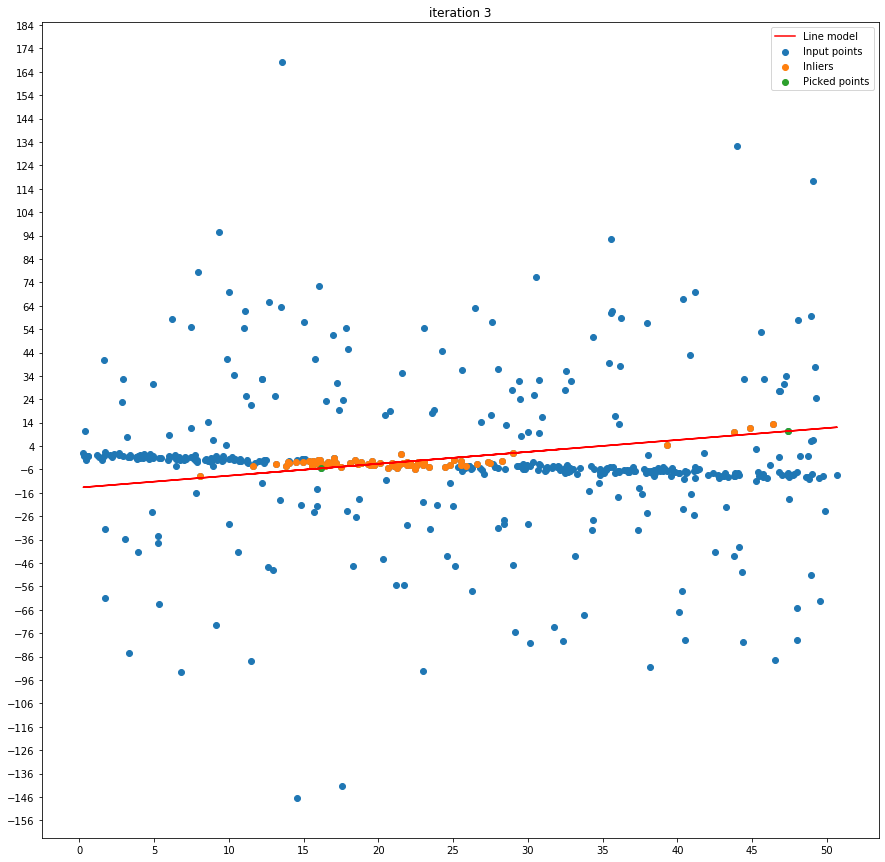

inlier ratio =  0.079
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


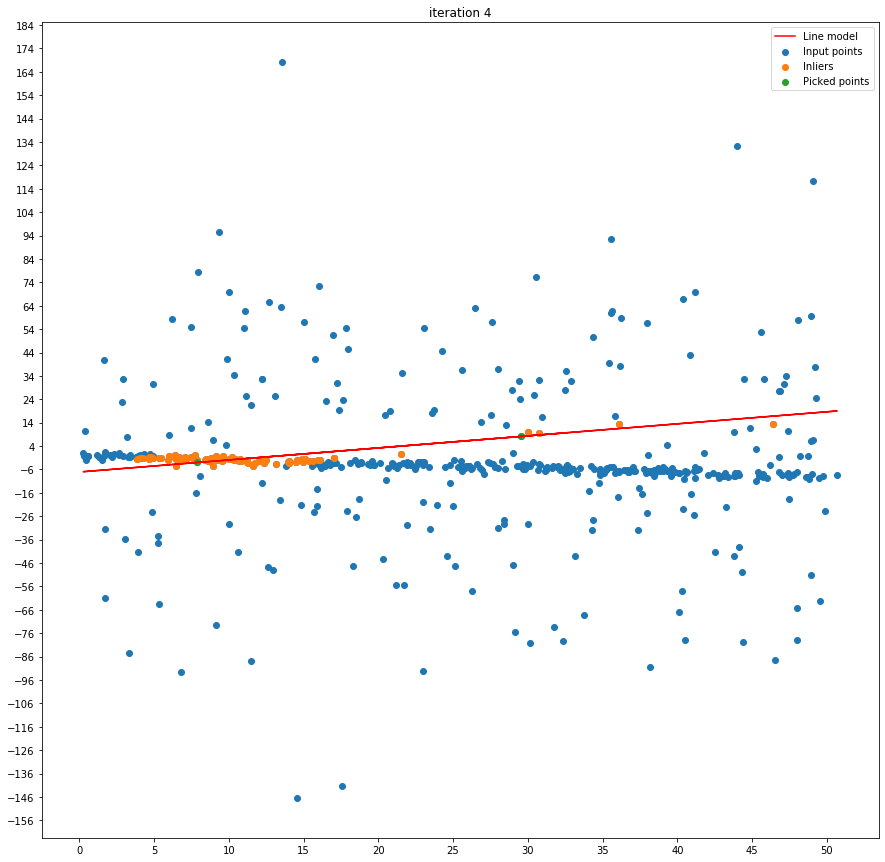

inlier ratio =  0.107
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


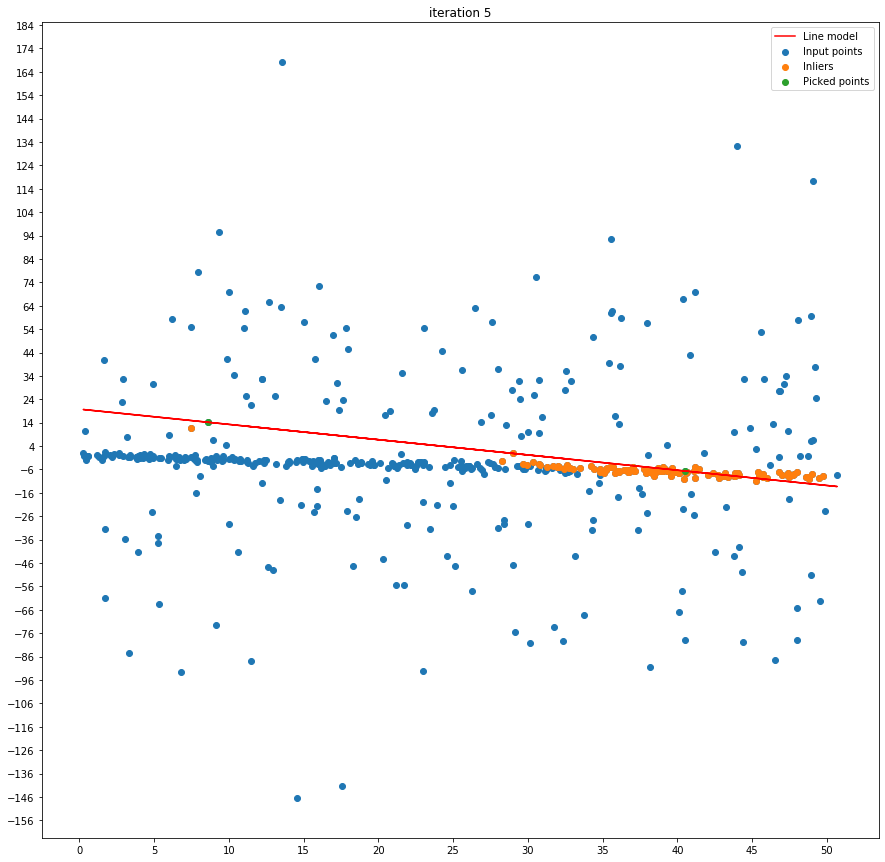

inlier ratio =  0.068
model_m =  -0.13989305611376676
model_c =  -0.5077111318828658


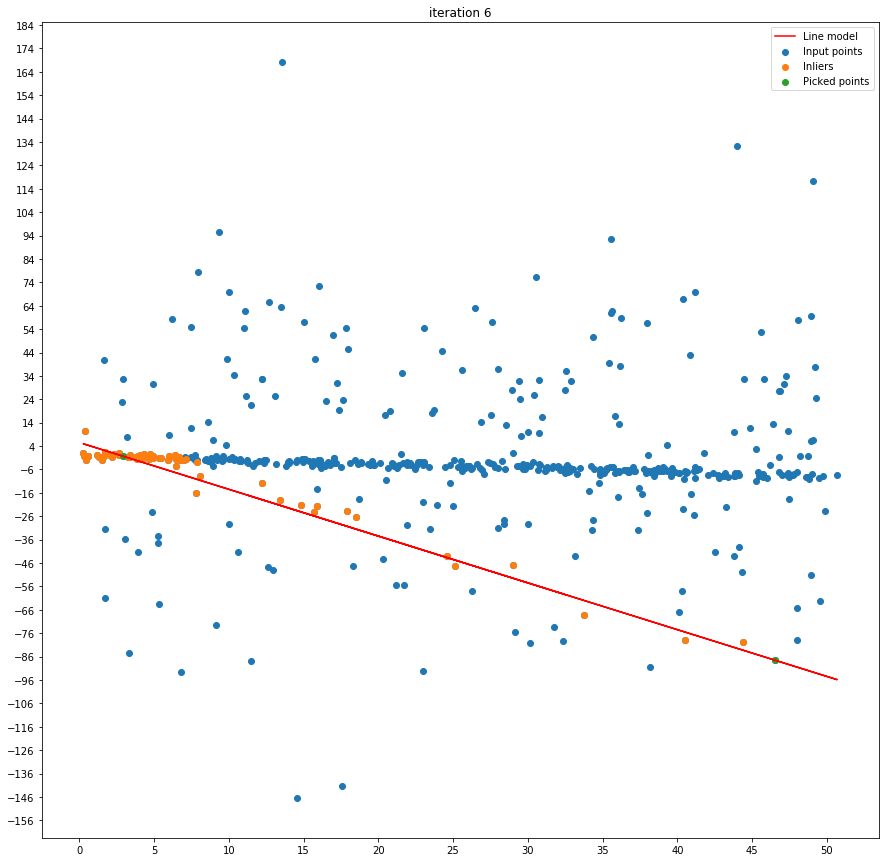

inlier ratio =  0.304
model_m =  -0.1457059295959794
model_c =  -0.8812020633150377


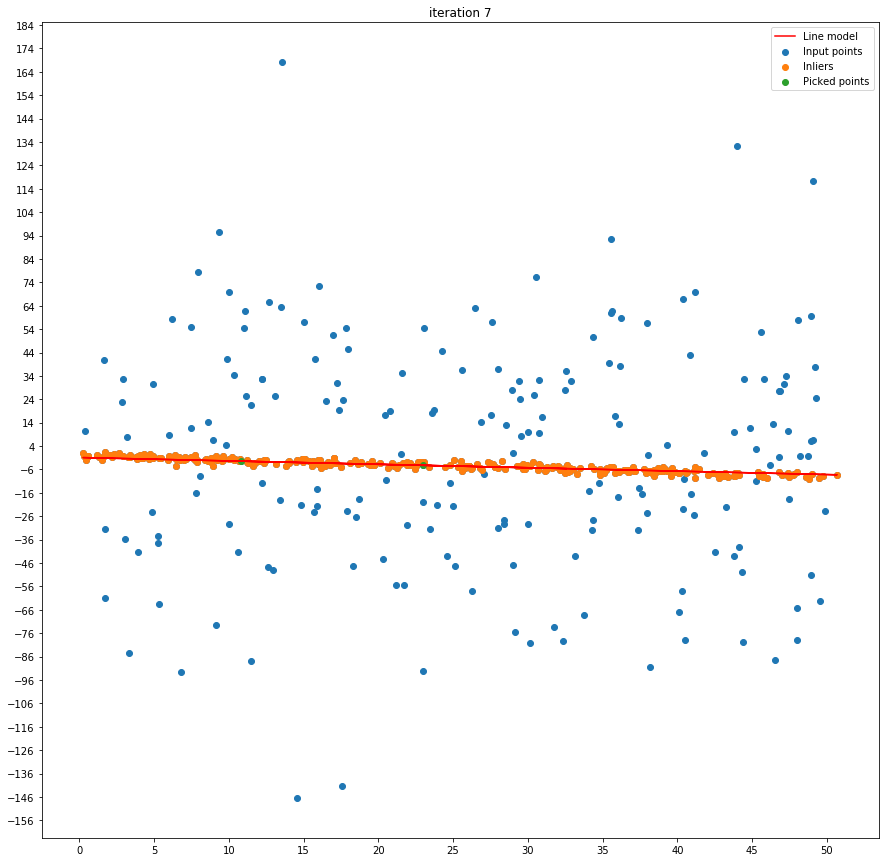

inlier ratio =  0.054
model_m =  -0.1457059295959794
model_c =  -0.8812020633150377


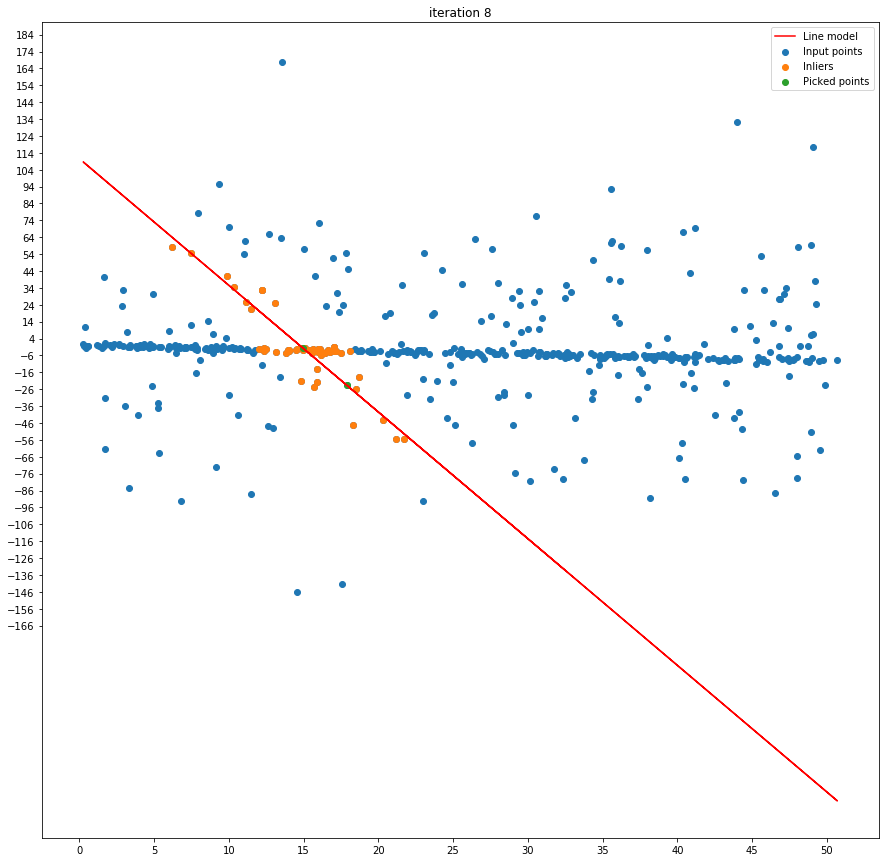

inlier ratio =  0.056
model_m =  -0.1457059295959794
model_c =  -0.8812020633150377


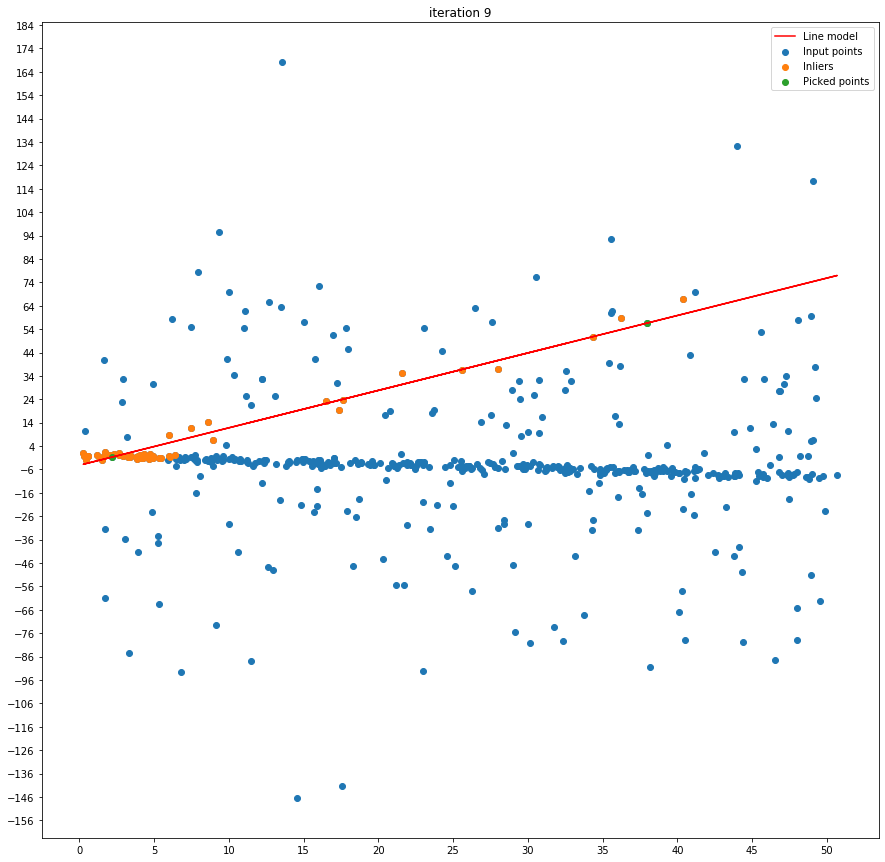

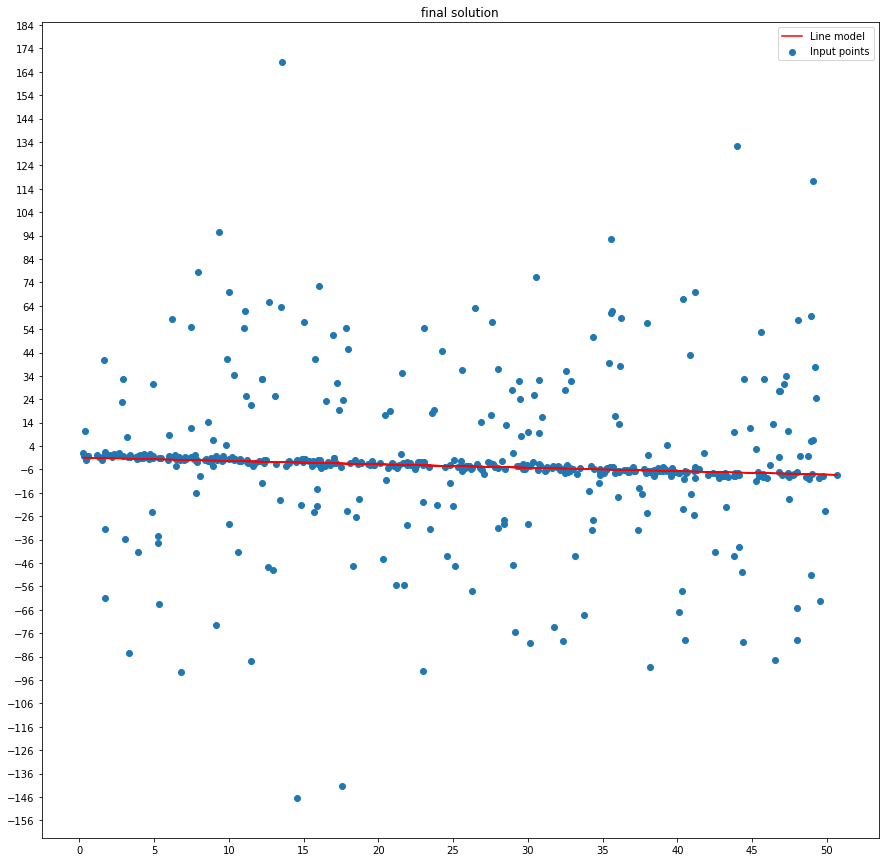

Final model:
inliner ratio =  0.304
model_m =  -0.1457059295959794
model_c =  -0.8812020633150377


In [64]:
# Perform RANSAC iterations
for it in range(ransac_iter):
    # pick 2 random points
    n = 2
    
    total_indices = np.arange(X.shape[0])
    np.random.shuffle(total_indices)
#     print(total_indices)
    indices_1 = total_indices[:n]
    indices_2 = total_indices[n:]
    
    maybe_points = data[indices_1,:]
    test_points = data[indices_2,:]
#     print(maybe_points)
    # find a line model for these points
    m, c = model_line(maybe_points)
    
    x_list = []
    y_list = []
    num = 0
    
    # find orthogonal lines to the model for all testing points
    for ind in range(test_points.shape[0]):
 
        x0 = test_points[ind,0]
        y0 = test_points[ind,1]
 
        # find an intercept point of the model with a normal from point (x0,y0)
        x1, y1 = intercept_point(m, c, x0, y0)
 
        # distance from point to the model
        dist = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)
 
        # check whether it's an inlier or not
        if dist < ransac_threshold:
            x_list.append(x0)
            y_list.append(y0)
            num += 1
 
    x_inliers = np.array(x_list)
    y_inliers = np.array(y_list)
    
    # in case a new model is better
    if num/float(n_samples) > ratio:
        ratio = num/float(n_samples)
        model_m = m
        model_c = c
        
    print("inlier ratio = ", num/float(n_samples))
    print("model_m = ", model_m)
    print("model_c = ", model_c)
    
    # plot the current step
    ransac_plot(it, X,y, m, c, False, x_inliers, y_inliers, maybe_points)
    
    # we are done in case we have enough inliers
    if num > n_samples*ransac_ratio:
        print("The model is found!")
        break
        
# plot the final model
ransac_plot(0, X,y, model_m, model_c, True)

print("Final model:")
print("inliner ratio = ", ratio)
print("model_m = ", model_m)
print("model_c = ", model_c)

In [18]:
# http://www.cse.psu.edu/~rtc12/CSE486/lecture15.pdf